## Chap03) Classification
## Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
x = np.array([6,8,12,15,20])
y = np.array([7,11,13,20.5, 19.3])

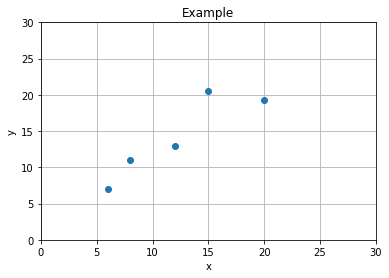

In [ ]:
plt.figure()
plt.plot(x, y, 'o')
plt.title('Example')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 30, 0, 30])
plt.grid()

## 1)Dataset

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다  
Breast_cancer Dataset  
Malignant(악성), Benign(양성)  
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값) 
- Samples per class : 212(M, labeled '0'), 357(B, labeled '1')

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

#print(cancer['DESCR'][:3000])

In [ ]:
#cancer

In [ ]:
#cancer.feature_names

In [ ]:
x=pd.DataFrame(cancer.data)
y=pd.Series(cancer.target)
#print(x.shape)
#print(y.shape)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=1234)

## 2) Model

#### - Scikit learn 에서 제공하는 Logistic Regression 라이브러리를 가지고 와서 모델로 사용한다

In [ ]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(solver= 'lbfgs').fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(model.coef_)
print(model.coef_.shape)
model.intercept_

[[ 0.98538176  0.50075211  0.29776533 -0.01051667 -0.03511857 -0.18100526
  -0.23368104 -0.09863983 -0.0374913  -0.00935292  0.0461119   0.38469232
   0.05419303 -0.11314674 -0.0014305  -0.03682048 -0.04144618 -0.01155263
  -0.00260726 -0.00391785  1.09107268 -0.58818577 -0.24902993 -0.020062
  -0.06437091 -0.59010834 -0.67536987 -0.19723223 -0.12798912 -0.05802577]]
(1, 30)


array([0.21096268])

In [ ]:
print('Train Accuracy : ', model.score(x_train, y_train))
print('Test Accuracy : ',model.score(x_test, y_test))

Train Accuracy :  0.9547738693467337
Test Accuracy :  0.9239766081871345


## 3) Hyperparameter조정  
 -C: 정규화 규제 조절 상수  
 -solver: 최적화에 사용할 알고리즘 결정   
 -max_iter: 최적화가 수렴하게 만드는 최대 반복 횟수 값   (default=100)  
 -penalty: L1, L2 제약 조건 설정  
 -class_weight: 데이터의 Positive에 직접 가중치를 설정하여 학습의 강도 조절  

### -C값 조절 (&max_iter)

In [ ]:
model1 = LogisticRegression(C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model2 = LogisticRegression(C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model3 = LogisticRegression(C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model4 = LogisticRegression(C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model5 = LogisticRegression(C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', model1.score(x_train, y_train))
print('Train Accuracy : ', model2.score(x_train, y_train))
print('Train Accuracy : ', model3.score(x_train, y_train))
print('Train Accuracy : ', model4.score(x_train, y_train))
print('Train Accuracy : ', model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


In [ ]:
print('Test Accuracy : ', model1.score(x_test, y_test))
print('Test Accuracy : ', model2.score(x_test, y_test))
print('Test Accuracy : ', model3.score(x_test, y_test))
print('Test Accuracy : ', model4.score(x_test, y_test))
print('Test Accuracy : ', model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573


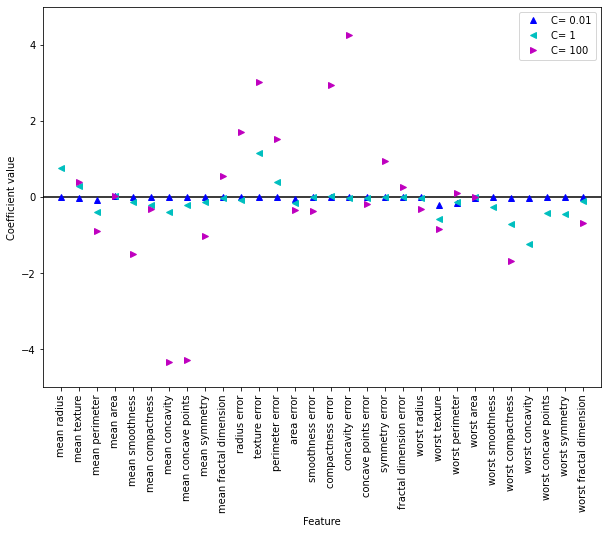

In [ ]:
plt.figure(figsize= (10,7))  #figsize 그래프 크기 조절

plt.plot(model1.coef_.T, '^b', label="C= 0.01") 
plt.plot(model3.coef_.T, '<c', label="C= 1")
plt.plot(model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) # X축 범주 넣기

xlims = plt.xlim(-1,30)
plt.hlines(0, -1, 30) # 수평선 긋기  hlines(y값, x최소값, x최대값)
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### -L2 정규화 적용

In [ ]:
l2_model1 = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model2 = LogisticRegression(penalty='l2',C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model3 = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model4 = LogisticRegression(penalty='l2',C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model5 = LogisticRegression(penalty='l2',C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l2_model1.score(x_train, y_train))
print('Train Accuracy : ', l2_model2.score(x_train, y_train))
print('Train Accuracy : ', l2_model3.score(x_train, y_train))
print('Train Accuracy : ', l2_model4.score(x_train, y_train))
print('Train Accuracy : ', l2_model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


In [ ]:
print('Test Accuracy : ', l2_model1.score(x_test, y_test))
print('Test Accuracy : ', l2_model2.score(x_test, y_test))
print('Test Accuracy : ', l2_model3.score(x_test, y_test))
print('Test Accuracy : ', l2_model4.score(x_test, y_test))
print('Test Accuracy : ', l2_model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573


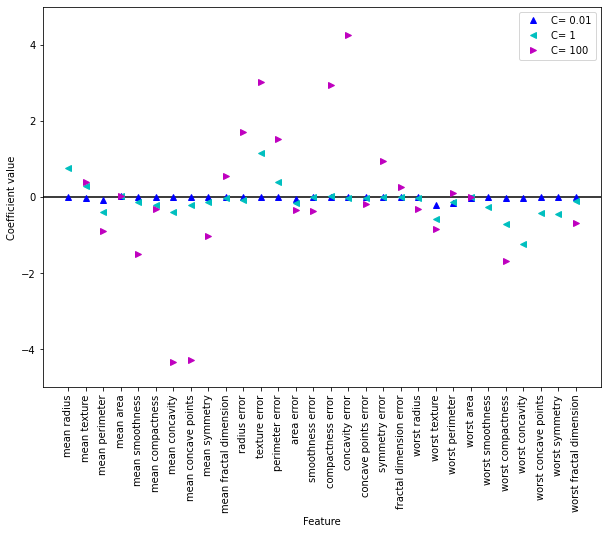

In [ ]:
plt.figure(figsize= (10,7))

plt.plot(l2_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l2_model3.coef_.T, '<c', label="C= 1")
plt.plot(l2_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### L1 정규화 적용

In [ ]:
l1_model1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model2 = LogisticRegression(penalty='l1',C=0.1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model3 = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model4 = LogisticRegression(penalty='l1',C=10, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model5 = LogisticRegression(penalty='l1',C=100, solver='liblinear', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l1_model1.score(x_train, y_train))
print('Train Accuracy : ', l1_model2.score(x_train, y_train))
print('Train Accuracy : ', l1_model3.score(x_train, y_train))
print('Train Accuracy : ', l1_model4.score(x_train, y_train))
print('Train Accuracy : ', l1_model5.score(x_train, y_train))

Train Accuracy :  0.9271356783919598
Train Accuracy :  0.9422110552763819
Train Accuracy :  0.9673366834170855
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9974874371859297


In [ ]:
print('Test Accuracy : ', l1_model1.score(x_test, y_test))
print('Test Accuracy : ', l1_model2.score(x_test, y_test))
print('Test Accuracy : ', l1_model3.score(x_test, y_test))
print('Test Accuracy : ', l1_model4.score(x_test, y_test))
print('Test Accuracy : ', l1_model5.score(x_test, y_test))

Test Accuracy :  0.9181286549707602
Test Accuracy :  0.9239766081871345
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9532163742690059


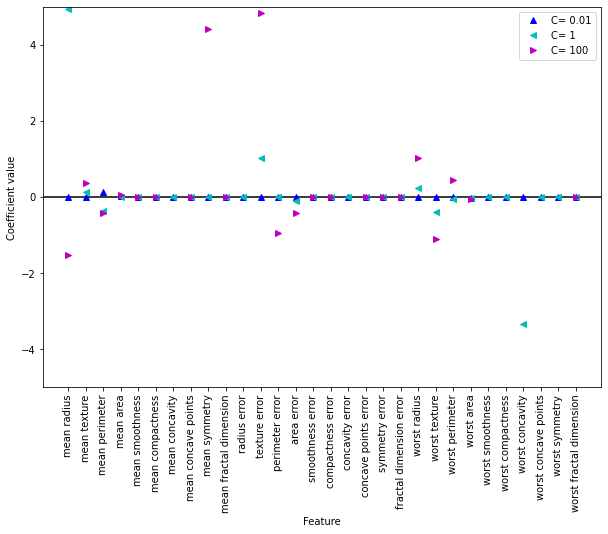

In [ ]:
plt.figure(figsize= (10,7))

plt.plot(l1_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l1_model3.coef_.T, '<c', label="C= 1")
plt.plot(l1_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

## 4.성능평가

### -최종모델 선정

In [ ]:

final_model = LogisticRegression(penalty='l1',
                                 C=100, 
                                 solver='liblinear', 
                                 max_iter=5000).fit(x_train, y_train)


In [ ]:
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

### - 성능 평가

confusion matrix : 각 양성,음성,양성,음성   
예측하는 음성 예측하는 양성   
True nagative(예측이 틀렸는지 맞았는지) / False nagative(양성인지 음성인지)   

---

모델이 뭐를 잘 맞추고 뭐를 잘 틀리는지 알 수 있다. 


* 정밀도(Precision)    
: Positive로 예측한 경우 중 실제로 Positive인 비율이다. 즉, 예측값이 얼마나 정확한가 이다. TP/FP+TP   

* 재현율(Recall)     
: 실제 Positive인 것 중 올바르게 Positive를 맞춘 것의 비율이다. 즉, 실제 정답을 얼마나 맞췄는가 이다. TP/FN+TP

* F1-Score    
:  Precision과 Recall의 조화평균으로 주로 분류 클래스 간의 데이터가 불균형이 심각할때 사용한다.   
: 데이터 분류 클래스가 균일하지 못하면 머신러닝 성능을 제대로 나타낼 수 없기 때문에 F1 Score를 사용한다.   
: F1 Score는 정밀도와 재현율의 조화평균이다.   
: 높을수록 좋은 모델이다.!!

> * 메일이 왔는데 스팸 메일여부를 판단하는 것은 정밀도가 중요하다.   
> * 암 검사를 위해 병원을 찾아온 사람에게 암여부를 예측할 때에는 재현율이 중요하다. 즉, 실제로 암인데 암이 아니라고 예측하면 큰일나기 때문이다.   

사이킷런은 정밀도 계산을 위해서 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공한다.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion = confusion_matrix(y_test, pred_test)  # confusion_matrix(실제값(암인지 아닌지), 예측값(양성인지 음성인지))  # 예측값이 정답(정상)이면 보통 0으로 두고, 정답(정상)이 아니면 1로 둔다 / y_test와 pred_test가 정답인지 아닌지가 같은지 틀린지 확인
acc       = accuracy_score(y_test, pred_test)
prc       = precision_score(y_test, pred_test)
rec       = recall_score(y_test, pred_test)
f1s       = f1_score(y_test, pred_test)

print('<Confusion matrix>')
print(confusion)
print(f'Accuracy:{acc:.2f}, Precision: {prc:.2f}, Recall: {rec:.2f}, F1-score: {f1s:.2f}')

<Confusion matrix>
[[ 60   6]
 [  2 103]]
Accuracy:0.95, Precision: 0.94, Recall: 0.98, F1-score: 0.96


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_test)
print(report)

# precision, recall, f1-score -> 세 개 모두 높으면 높을수록 좋음(0과 1사이 값들이다.)
# precision : 양성 판정에 대한 맞춤 정도  / 모델 평가하려고 여러 metrics를 쓴다.

# 모델의 정확도(accuracy)는 0.95%로 괜찮은 성능을 가지고 있다. 

# support는 실제 개수를 의미함

# macro avg  : 단순하게 평균을 낸 것.
# weighted avg : 레이블들이 개수가 다를경우, 레이블간에 weight를 둬서 조금 더 밸런싱을 한 것이다.
# ex) 뇌종양같은 경우 양성인 경우는 되게 적고, 음성인 경우는 되게 많다. 양성이 2개고 음성이 98개면 98%성공률을 가지고 있다. -> 이 현상을 방지하기 위한 방법

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### -정확도(Precision) 과 재현율(Recall)

예측할 때 확률로 예측한다.    
예측하는 값들에 마지막에 스그모이드값들을 끼워서 0과 1사이로 지정함.   
예측하는 확률값을 받는다.

In [ ]:
final_model.predict_proba(x_test)  # 가로로(열끼리) 더하면 다 1이 나온다

array([[1.98172820e-003, 9.98018272e-001],
       [5.52424773e-012, 1.00000000e+000],
       [2.67537600e-005, 9.99973246e-001],
       [4.43264671e-007, 9.99999557e-001],
       [8.65708849e-009, 9.99999991e-001],
       [3.62426084e-005, 9.99963757e-001],
       [9.99629769e-001, 3.70231030e-004],
       [1.16493171e-009, 9.99999999e-001],
       [1.00000000e+000, 1.58208070e-024],
       [1.00000000e+000, 2.25531298e-015],
       [1.00000000e+000, 2.41986876e-020],
       [1.60908388e-003, 9.98390916e-001],
       [1.99351549e-007, 9.99999801e-001],
       [2.72786243e-003, 9.97272138e-001],
       [2.51183203e-006, 9.99997488e-001],
       [1.00000000e+000, 1.32921984e-030],
       [1.31805677e-012, 1.00000000e+000],
       [1.78408399e-011, 1.00000000e+000],
       [8.71818839e-010, 9.99999999e-001],
       [9.99999997e-001, 2.90084238e-009],
       [5.09970963e-005, 9.99949003e-001],
       [9.99923662e-001, 7.63379462e-005],
       [1.00000000e+000, 7.13419671e-026],
       [1.0

In [ ]:
np.sum(final_model.predict_proba(x_test), axis = 1)  # 열끼리 더하면 1이 나옴  # axis = 1은 열끼리, axis = 0은 행끼리
# 양성일 확률 + 음성일 확률 = 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [ ]:
final_model.predict_proba(x_test).shape

(171, 2)

In [ ]:
# predict_proba에서 0번째는 정상일 확률이니까 첫번째꺼를 넣어서 각 값을 받는다.
# precisions, recalls, thresholds 이렇게 세개의 값을 받는다.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, final_model.predict_proba(x_test)[:, 1])
print(precisions.shape)
print(thresholds.shape)  # 우리는 예측하는 확률값을 받았다. thresholds는 여기에서 잘라서 양성인지 음성인지 판단하는 것. 자르는 기준을 여러가지 확률로 나타낸다.

(114,)
(113,)


In [ ]:
thresholds  # 0.25를 기준으로 자르는 것도 있고, 아래 숫자를 보면 더 다양한 기준이 있다.  (이건 확률값 아닌듯?)

array([0.25427647, 0.26668404, 0.43021998, 0.45638899, 0.52608162,
       0.7190581 , 0.91061346, 0.9232301 , 0.96101004, 0.96953927,
       0.98660236, 0.98784603, 0.98882102, 0.99478847, 0.99514792,
       0.99549198, 0.99722222, 0.99727214, 0.99801827, 0.99839092,
       0.99877303, 0.999145  , 0.99928609, 0.99929568, 0.99937702,
       0.99939539, 0.99943807, 0.99944556, 0.99952506, 0.9998001 ,
       0.99992947, 0.99994757, 0.999949  , 0.99996153, 0.99996376,
       0.99997307, 0.99997325, 0.99997531, 0.99998905, 0.99998968,
       0.99999346, 0.999996  , 0.99999684, 0.99999739, 0.99999749,
       0.9999978 , 0.9999981 , 0.99999848, 0.99999888, 0.99999946,
       0.99999953, 0.99999956, 0.99999961, 0.99999972, 0.99999974,
       0.99999977, 0.9999998 , 0.99999983, 0.99999985, 0.99999992,
       0.99999992, 0.99999992, 0.99999994, 0.99999995, 0.99999995,
       0.99999995, 0.99999996, 0.99999996, 0.99999996, 0.99999998,
       0.99999998, 0.99999998, 0.99999999, 0.99999999, 0.99999

* Threshold(임계값)   
: 0과 1로 분류하는 것의 기준을 임계값이라고 한다.    
기본적으로 0.5로 설정되어 있으며, 0.5이상이면 1이고 아니면 0이 된다.
      
  따라서 적절한 임계값을 찾아서 정밀도와 재현율을 효율적으로 만들어야 한다. 

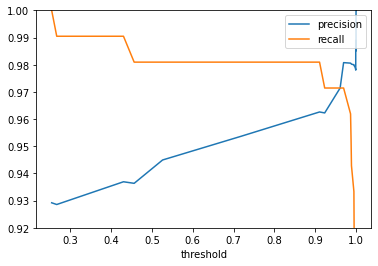

In [ ]:
# Threshold(임계값) 와 관계
plt.figure()
plt.plot(thresholds,  precisions[0:-1], label = 'precision') # precision 마지막 값은 1이 포함, 마지막 값 제외  # precisions에 대한 thresholds를 올려봤을 때 나오는 그래프
plt.plot(thresholds, recalls[0:-1], label = 'recall')  # recall의 마지막 값은 0이 포함, 마지막 값 제외         # recalls에 대한 thresholds도 올려봤을 때 나오는 그래프 
plt.xlabel('threshold')
plt.ylim([0.92,1])
plt.legend(loc = 'upper right') # upper/ center/ lower

# precisions과 recalls 둘 다 모두 높은 것이 좋은 것 -> 두개를 만족하는 thresholds는 두개가 만나는 지점..?

* threshold 조절

In [ ]:
prob = final_model.predict_proba(x_test)[:, 1] # class 1 에 해당하는 값만 지정
prob = np.round(prob,3)  # numpy에서 지정된 소수점 자리까지 반올림
prob  # 확률값

array([0.998, 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   ,
       0.   , 0.   , 0.998, 1.   , 0.997, 1.   , 0.   , 1.   , 1.   ,
       1.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.997, 1.   ,
       1.   , 0.   , 0.456, 1.   , 0.   , 1.   , 0.   , 0.995, 0.989,
       1.   , 1.   , 0.999, 0.   , 0.999, 0.97 , 1.   , 1.   , 0.   ,
       0.923, 1.   , 1.   , 1.   , 1.   , 0.   , 0.987, 1.   , 0.995,
       1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 0.961, 1.   , 0.   ,
       1.   , 0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   , 1.   ,
       1.   , 0.999, 0.267, 0.   , 0.   , 0.   , 0.   , 0.999, 0.063,
       1.   , 1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.   , 0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 0.   ,
       0.   , 0.999, 0.   , 1.   , 0.   , 0.   , 0.999, 1.   , 1.   ,
       0.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   ,
       0.   , 0.   ,

In [ ]:
from sklearn.preprocessing import Binarizer
prob = prob.reshape(-1,1) # 차원 추가 
adj_prob = Binarizer(threshold = 0.9).fit_transform(prob)   # threshold 값보다 작거나 같으면 0 , else 1 
# 위에서 threshold 값을 주고 threshold 값보다 작으면 0, 높으면 1

In [ ]:
#Threshold 값 바뀐 precision, recall 값 확인
report = classification_report(y_test, adj_prob)
print(report)   # support는 실제 개수를 의미함

# 위에서는 0.95이었는데 threshold 값을 조정했더니 0.96, 0.97정도로 높아지게 나왔다.

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.96      0.98      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

